In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from scipy.stats import exponnorm
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, sosfiltfilt, find_peaks, peak_widths, butter
import math

from signal_processing import als_psalsa

In [17]:
df = pd.read_parquet("./test.parquet")
raw_signal = df["y"].to_numpy()
times = df["x"].to_numpy()
dt = times[1] - times[0]

(-3.0, 10.0)

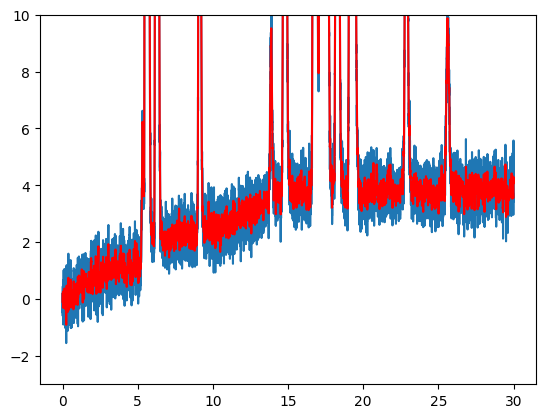

In [23]:
sos = butter(1, 60*dt, output="sos")
butter_signal = sosfiltfilt(sos, raw_signal)

plt.plot(times, raw_signal)
plt.plot(times, butter_signal, c="red")
plt.ylim((-3, 10))

In [19]:
#Get a baseline by removing high frequency noise
baseline, baseline_time = als_psalsa(times, butter_signal)
spline = CubicSpline(baseline_time, baseline)
baselined_signal = raw_signal - spline(times)

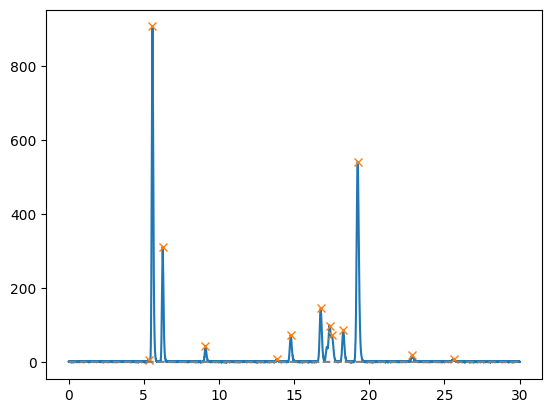

In [21]:
peaks, _ = find_peaks(
    baselined_signal,
    height=3,
    prominence=3,
    distance=5,
)
plt.plot(times, baselined_signal)
# plt.plot(times, butter_signal - spline(times), c="red")

plt.plot(times[peaks], baselined_signal[peaks], "x")
plt.plot(times, np.zeros_like(times), "--", color="gray")

In [24]:
%load_ext Cython


In [40]:
%%cython 

def f(n):
    a = 0
    for i in range(n):
        a += i
    return a

cpdef g(int n):
    cdef long a = 0
    cdef int i
    for i in range(n):
        a += i
    return a

In [41]:
%timeit g(1000000)

44 ns ± 3.22 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [42]:
%timeit f(1000000)

41.9 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
